In [11]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt



In [12]:
# sciezki do plikow 

Data_dir = "C:/Users/kubol/DesLab/DesLab/get_training_images/get_training_images/training_images"
Categories = ['up', 'down']

for category in Categories:
    path = os.path.join(Data_dir, category) # sciezka do up lub down
    for img in os.listdir(path): #zamieniamy wszystko na array i na czarno-biale (gdy kolor nie jest wazny)
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break


(720, 1280)
(130, 130)


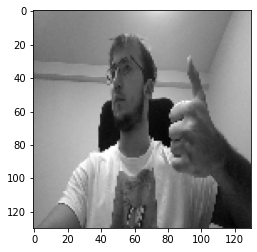

In [13]:
print(img_array.shape)

#u nas aktualnie mamy wszystkie zdjecia do nauczania 350 na 350 //////JUZ NIE!
# 
#ALE
#gdybysmy nauczali siec, zdjeciami o roznych rozmiarach, trzeba
#je wszystkie zmienic na ten sam rozmiar np. 110 na 110

IMG_SIZE = 130


resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resized_array, cmap="gray")

print(resized_array.shape)

In [14]:
training_data = []

def create_training_data():

    for category in Categories:
        path = os.path.join(Data_dir, category) # sciezka do up lub down
        class_num = Categories.index(category) #tworzymy numerki do tego co klasyfikujemy
        for img in os.listdir(path): #zamieniamy wszystko na array i na czarno-biale (gdy kolor nie jest wazny)
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #zamieniamy od razu na rozmiar 75x75
                training_data.append([resized_array, class_num])
            except Exception as e:
                pass
            
create_training_data()
    

In [15]:
print(len(training_data))

2400


In [16]:
#zeby siec neuronowa efektywnie sie uczyla, musi randomowo wybierac obrazy

import random

random.shuffle(training_data)

In [17]:
for sample in training_data[:20]:
    print(sample[1])

0
0
0
0
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0


In [18]:
X = [] #feature set
y = [] #labels 

In [19]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1  )
y = np.array(y)

In [20]:
#zapisujemy dane
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)